In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [77]:
#Checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

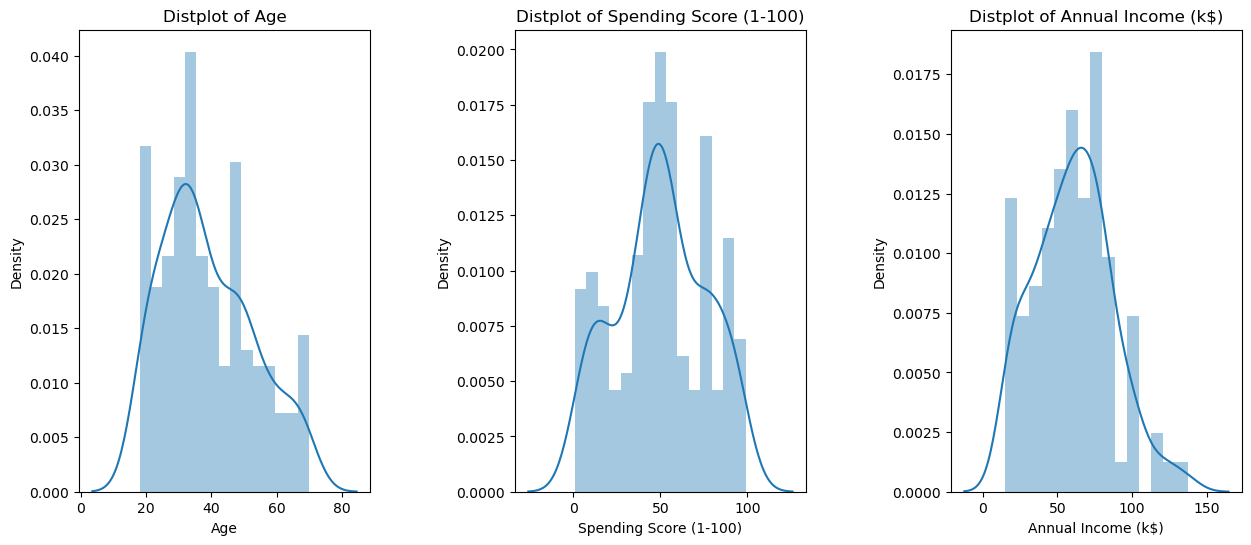

In [78]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age','Spending Score (1-100)','Annual Income (k$)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

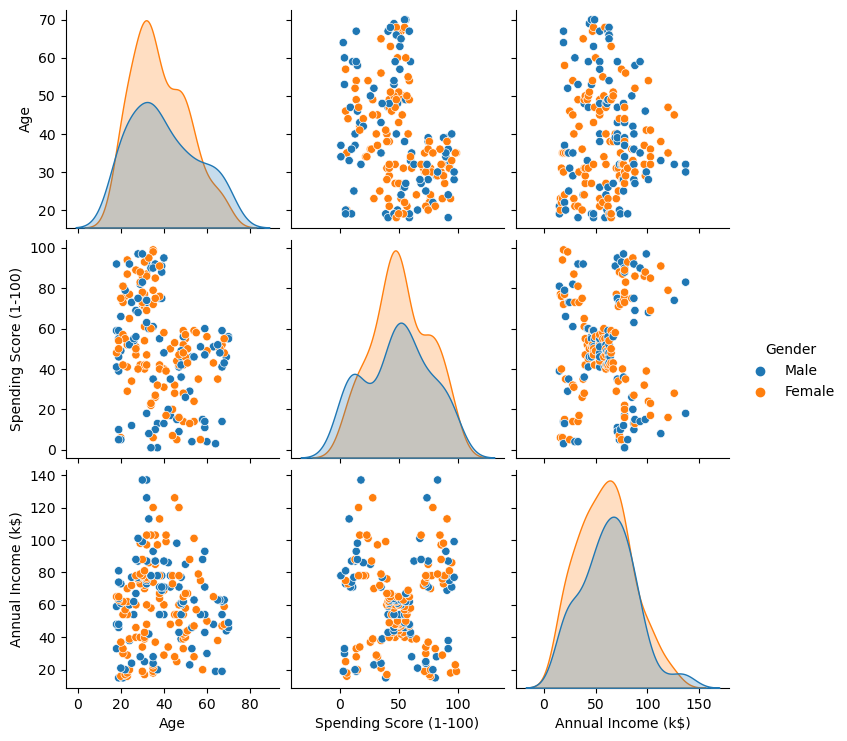

In [79]:
sns.pairplot(df, vars = ['Age','Spending Score (1-100)','Annual Income (k$)'], hue = 'Gender')

In [80]:
from sklearn.preprocessing import StandardScaler

In [83]:
df1=df.drop('Gender',axis=1)
df1=df1.drop('CustomerID',axis=1)
df1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [41]:
#df2=df['HS'].str.split('*',expand=True)
df2[0]

0     200
1     169
2     164
3     189
4     144
     ... 
74    133
75     96
76    120
77    156
78    112
Name: 0, Length: 79, dtype: object

In [84]:
from sklearn.preprocessing import StandardScaler
sa=StandardScaler()
std=sa.fit_transform(df1)

In [85]:
#df1['HS']=df2[0]
df1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [86]:
df2=pd.DataFrame(std,columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df2

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [87]:
#X1 = df5[['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0']].iloc[: , :].values
clusters=list(range(2,8))
inertia = []
for n in clusters:
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(df2)
    inertia.append(algorithm.inertia_)

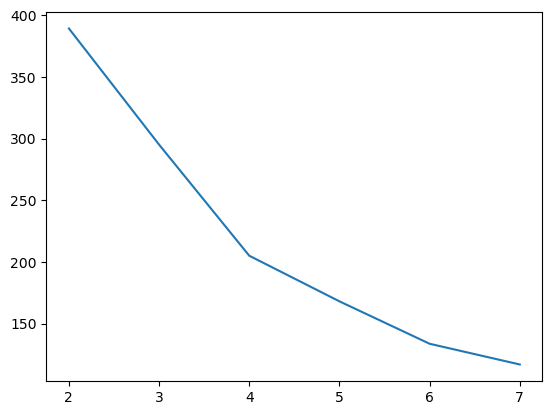

In [88]:
plt.plot(clusters,inertia);

In [92]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(df2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [90]:
from sklearn.metrics import silhouette_score
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 0)
    kmeans.fit(df2)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.33547192894004574
For n_clusters=3, the silhouette score is 0.3579234303882264
For n_clusters=4, the silhouette score is 0.4039582785148566
For n_clusters=5, the silhouette score is 0.41664341513732767
For n_clusters=6, the silhouette score is 0.4268547747113388
For n_clusters=7, the silhouette score is 0.4224193807843743
For n_clusters=8, the silhouette score is 0.40984180231920697


In [91]:
df['Cluster_Id']=cluster_labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,0
3,4,Female,23,16,77,5
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,6
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


In [98]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

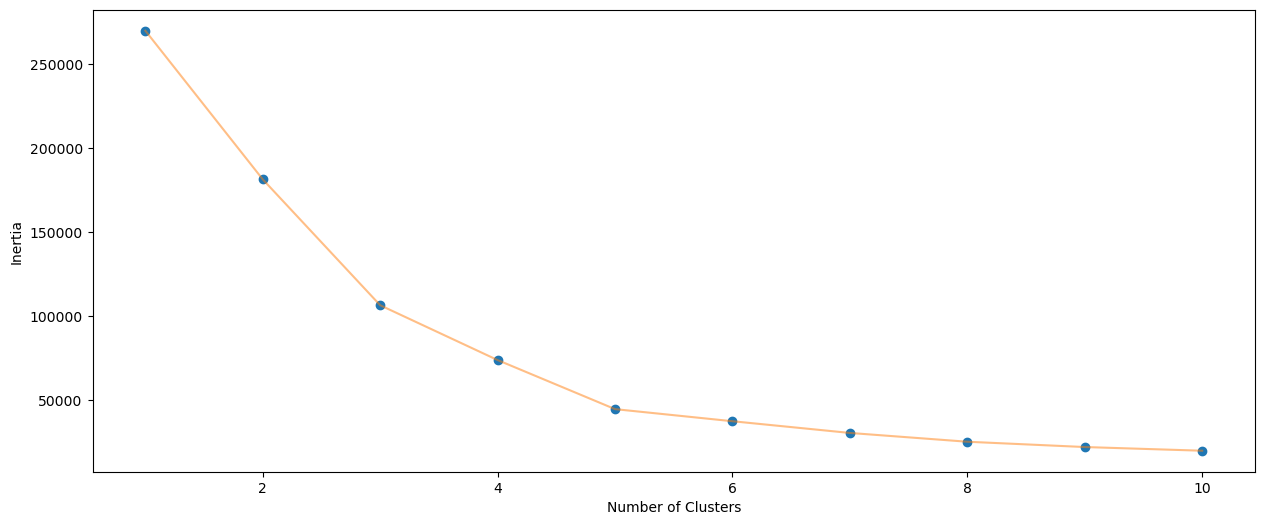

In [99]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [100]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [110]:
np.c_[xx.ravel(), yy.ravel()]

SyntaxError: invalid syntax (3749847315.py, line 1)

In [101]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
#ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

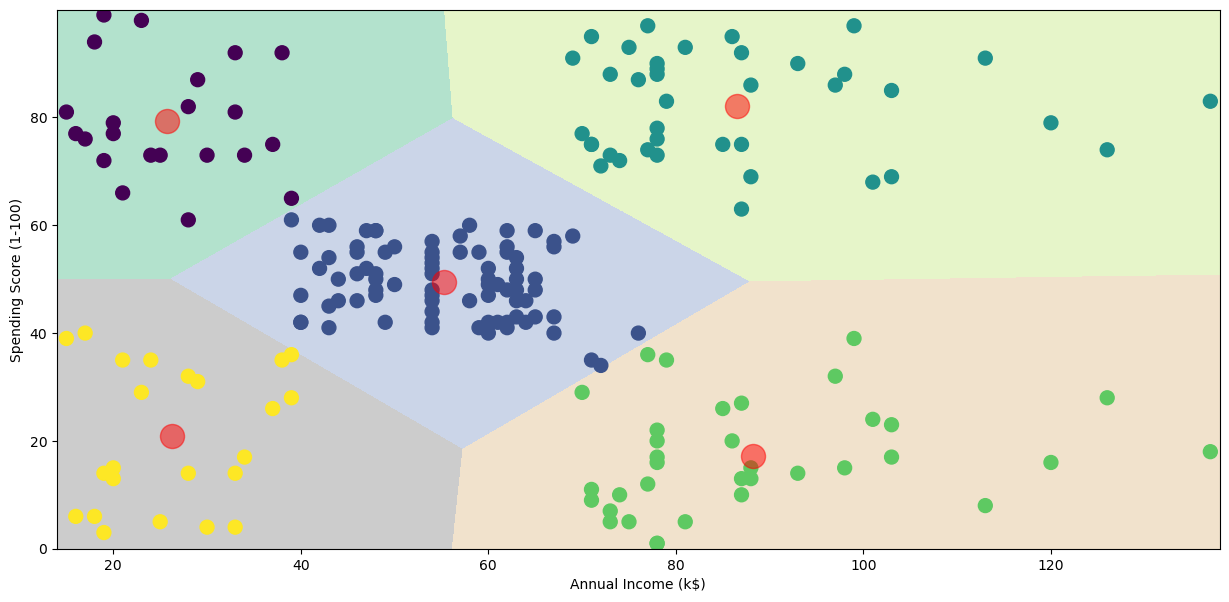

In [102]:
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
#The clf() function in pyplot module of matplotlib library is used to clear the current figure. 
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [ ]:
# method 2


In [116]:
X= df.iloc[:, [3,4]].values

In [117]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#inertia_ is the formula used to segregate the data points into clusters

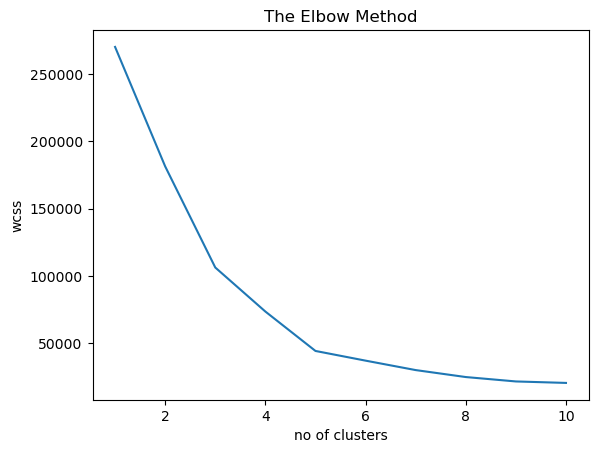

In [118]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [119]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [122]:
pd.DataFrame(y_kmeans)

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


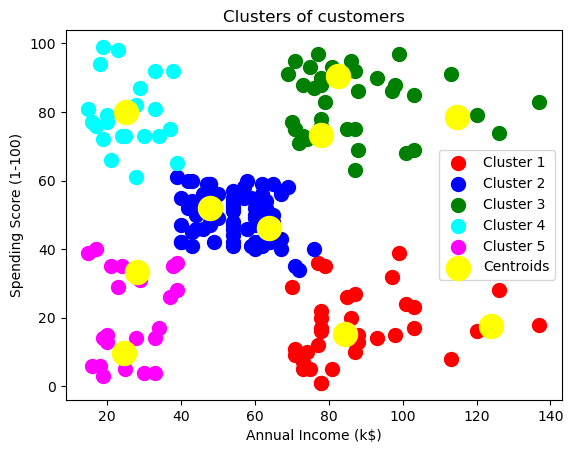

In [123]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less